In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('bank-full.csv', sep=';')

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
df.shape

(45211, 17)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [6]:
df.nunique()

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
y               2
dtype: int64

In [7]:
df['subscribed'] = [1 if x == 'yes' else 0 for x in df['y']]

In [8]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,subscribed
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,0


In [9]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous,subscribed
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323,0.116985
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441,0.321406
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000,1.000000


In [10]:
df.dtypes

age            int64
job           object
marital       object
education     object
default       object
balance        int64
housing       object
loan          object
contact       object
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome      object
y             object
subscribed     int64
dtype: object

In [11]:
import matplotlib.pyplot as plt

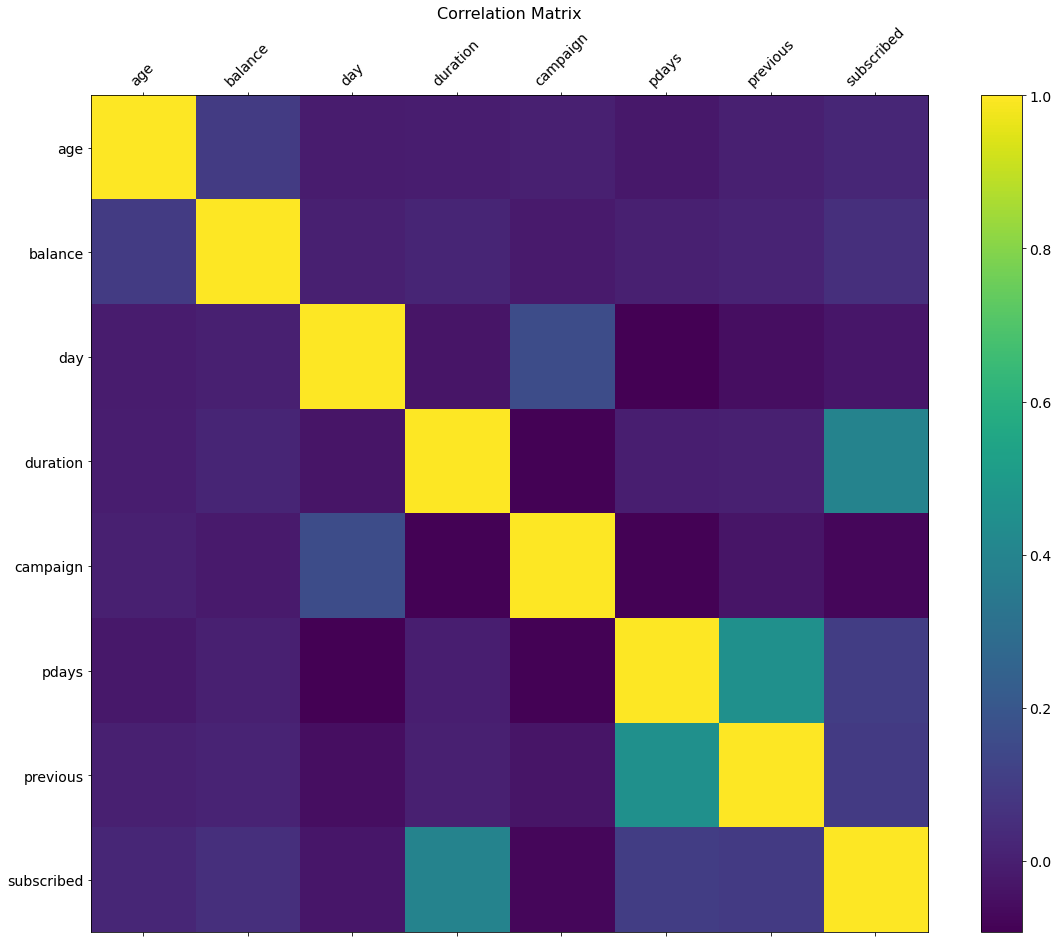

In [12]:
f = plt.figure(figsize=(19, 15))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

In [13]:
print(f"Total number of subcriptions: {df['subscribed'].sum()} out of {df.shape[0]}")

Total number of subcriptions: 5289 out of 45211


In [14]:
print(f"Subscription rate = {(df['subscribed'].sum()*100/df.shape[0]).round(2)}%")

Subscription rate = 11.7%


In [15]:
# number of subscriptions per campaign
(pd.DataFrame(df.groupby('campaign')['subscribed'].sum())).reset_index()

,campaign,subscribed
0,1,2561
1,2,1401
2,3,618
3,4,317
4,5,139
5,6,92
6,7,47
7,8,32
8,9,21
9,10,14


In [16]:
# number of customers targetted by each campaign
(pd.DataFrame(df.groupby('campaign')['subscribed'].count())).reset_index()

,campaign,subscribed
0,1,17544
1,2,12505
2,3,5521
3,4,3522
4,5,1764
5,6,1291
6,7,735
7,8,540
8,9,327
9,10,266


In [17]:
# conversion rate for each campaign
conv_by_camp = (df.groupby('campaign')['subscribed'].sum() / df.groupby('campaign')['subscribed'].count() * 100.0).round(2)
conv_by_camp.head(10)

campaign
1     14.60
2     11.20
3     11.19
4      9.00
5      7.88
6      7.13
7      6.39
8      5.93
9      6.42
10     5.26
Name: subscribed, dtype: float64

In [18]:
# subscription rate by age
age_df = (df.groupby('age')['subscribed'].sum() / df.groupby('age')['subscribed'].count() * 100.0).round(2)
age_df.head(100)

age
18     58.33
19     31.43
20     30.00
21     27.85
22     31.01
       ...  
90    100.00
92    100.00
93    100.00
94      0.00
95     50.00
Name: subscribed, Length: 77, dtype: float64

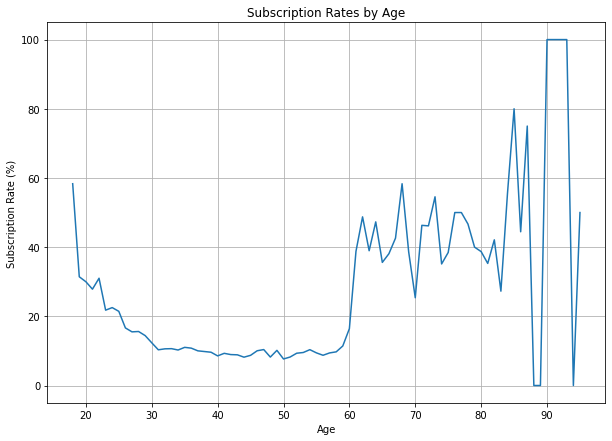

In [19]:
import matplotlib.pyplot as plt

# subscription rate by age
ax = age_df.plot(grid=True, figsize=(10, 7), title='Subscription Rates by Age')

ax.set_xlabel('Age')
ax.set_ylabel('Subscription Rate (%)')

plt.show()

In [20]:
# subscription ra based on education
subscribed_by_ed = pd.pivot_table(df, values='y', index='education', columns='subscribed', aggfunc=len)
subscribed_by_ed

subscribed,0,1
education,,
primary,6260,591
secondary,20752,2450
tertiary,11305,1996
unknown,1605,252


In [21]:
subscribed_by_ed.columns = ['not subscribed', 'subscribed']

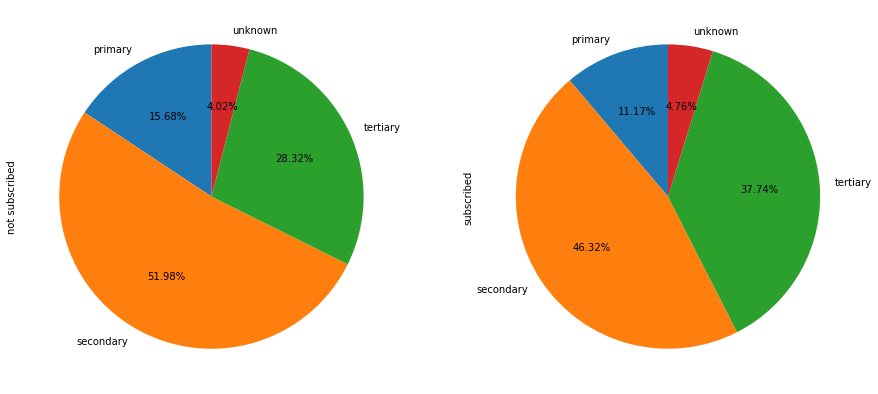

In [22]:
subscribed_by_ed.plot(
    kind='pie',
    figsize=(15, 7),
    startangle=90,
    subplots=True,
    autopct=lambda x: '%0.2f%%' % x,
    legend=False
)

plt.show()

In [23]:
new_order = [1,0]
subscribed_by_ed = subscribed_by_ed[subscribed_by_ed.columns[new_order]]
subscribed_by_ed

,subscribed,not subscribed
education,,
primary,591,6260
secondary,2450,20752
tertiary,1996,11305
unknown,252,1605


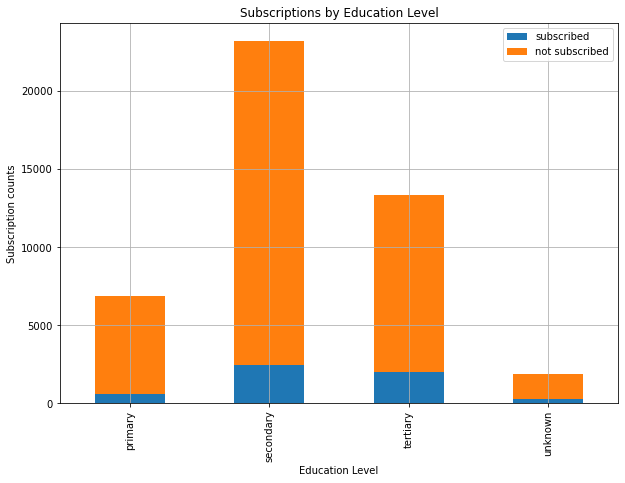

In [24]:
ax = subscribed_by_ed.loc[['primary','secondary','tertiary','unknown']].plot(
    kind='bar', 
    grid=True,
    stacked=True,
    figsize=(10,7))

ax.set_title('Subscriptions by Education Level')
ax.set_xlabel('Education Level')
ax.set_ylabel('Subscription counts')

plt.show()

In [25]:
# subscription rate by jobs
subcription_rate_by_job = df.groupby('job')['subscribed'].sum() / df.groupby('job')['subscribed'].count() * 100.0
subcription_rate_by_job = subcription_rate_by_job.sort_values(ascending=False)
subcription_rate_by_job

job
student          28.678038
retired          22.791519
unemployed       15.502686
management       13.755551
admin.           12.202669
self-employed    11.842939
unknown          11.805556
technician       11.056996
services          8.883004
housemaid         8.790323
entrepreneur      8.271688
blue-collar       7.274969
Name: subscribed, dtype: float64

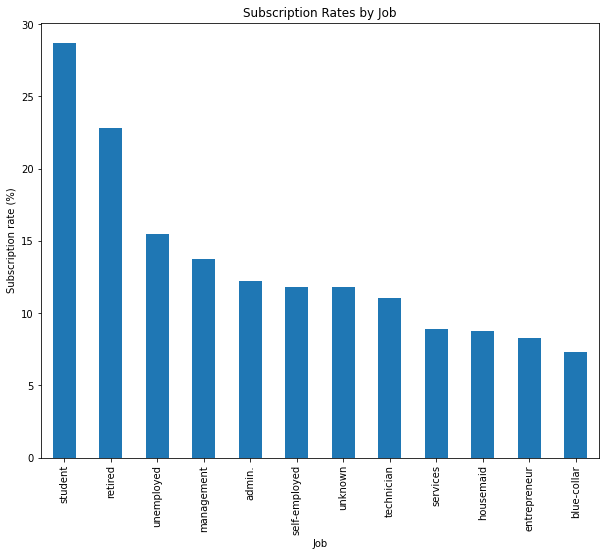

In [31]:
ax = subcription_rate_by_job.plot(
    kind='bar',
    figsize=(10, 8),
    title='Subscription Rates by Job')

ax.set_xlabel('Job')
ax.set_ylabel('Subscription rate (%)')

plt.show()

In [32]:
# subscription rate by marital status
subcription_rate_by_marital_status = df.groupby('marital')['subscribed'].sum() / df.groupby('marital')['subscribed'].count() * 100.0
subcription_rate_by_marital_status = subcription_rate_by_marital_status.sort_values(ascending=False)
subcription_rate_by_marital_status

marital
single      14.949179
divorced    11.945458
married     10.123466
Name: subscribed, dtype: float64

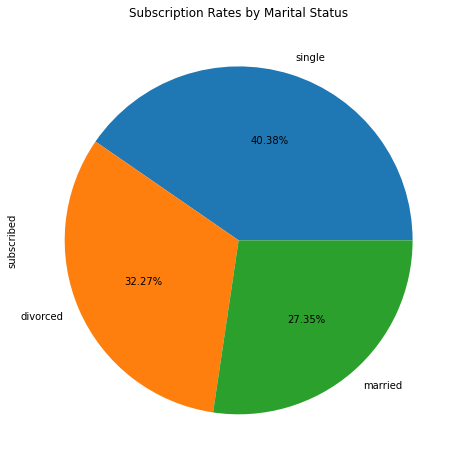

In [35]:
ax = subcription_rate_by_marital_status.plot(
    kind='pie',
    figsize=(10, 8),
    autopct=lambda x: '%0.2f%%' % x,
    title='Subscription Rates by Marital Status')


plt.show()